In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ebf9fb68e0a8ad7fcdbedae47d649a235ea0ab032baef935fc5d8d62f5194a0d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.2 MB/s eta 0:00:00


**Installing dependencies**

In [2]:

#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit.visualization import plot_state_qsphere

**Quantum Phase Estimation**

In [5]:
class quantum_phase:
    def __init__(self, n):
        self.n = n
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None

    def prepare_circuit(self):
        qc = QuantumCircuit(self.n, self.n-1)
        qc.x(self.n-1)
        for qubit in range(self.n-1):
            qc.h(qubit)
        repetitions = 1
        for counting_qubit in range(self.n-1):
            for i in range(repetitions):
                qc.cp(math.pi/4, counting_qubit, self.n-1); # controlled-T
            repetitions *= 2
        qc.barrier()
        # Apply inverse QFT
        qc = qc.compose(QFT(2, inverse=True), [0,1])
        # Measure
        qc.barrier()
        for n in range(self.n - 1):
            qc.measure(n,n)
        return qc

    def prepare_circuit1(self):
        qc1 = QuantumCircuit(self.n, self.n-1)
        qc1.x(self.n-1)
        for qubit in range(self.n-1):
            qc1.h(qubit)
        repetitions = 1
        for counting_qubit in range(self.n-1):
            for i in range(repetitions):
                qc1.cp(math.pi/4, counting_qubit, self.n-1); # controlled-T
            repetitions *= 2
        qc1.barrier()
        # Apply inverse QFT
        qc1 = qc1.compose(QFT(2, inverse=True), [0,1])
        # Measure
        qc1.barrier()
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_result(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return plot_histogram(counts)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [6]:
simulator = quantum_phase(3)
simulator.run_simulation()

**Counts**

In [7]:
simulator.get_counts()

{'11': 64, '01': 447, '10': 74, '00': 439}

**Running simuation wihout measurements**

In [8]:
simulator.run_simulation1()

**Density matrix**

In [9]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

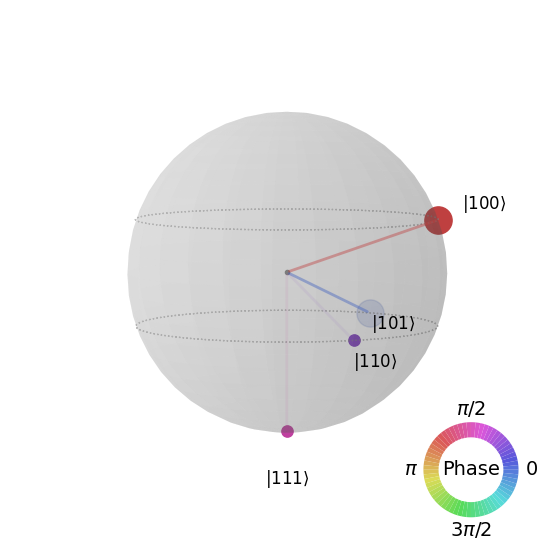

In [10]:
simulator.get_qsphere()

**City Representation**

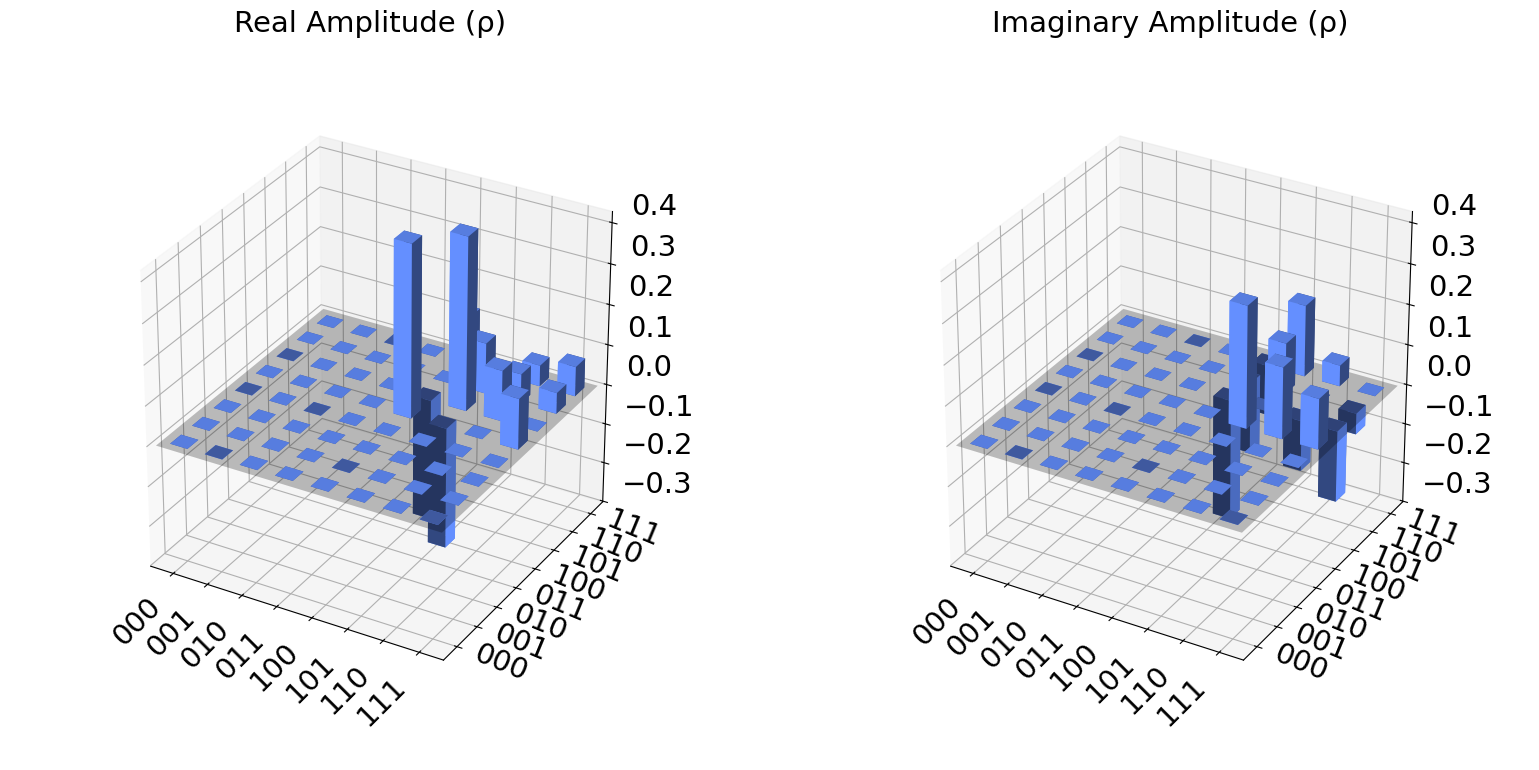

In [11]:
simulator.get_city()

**Circuit Representation**

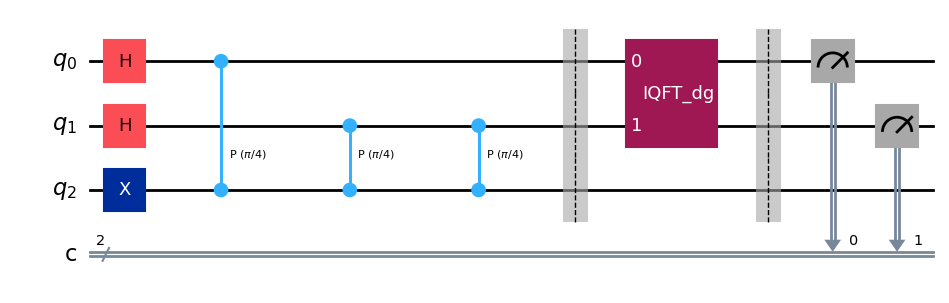

In [12]:
simulator.get_circuit()

**Hinton Representation**

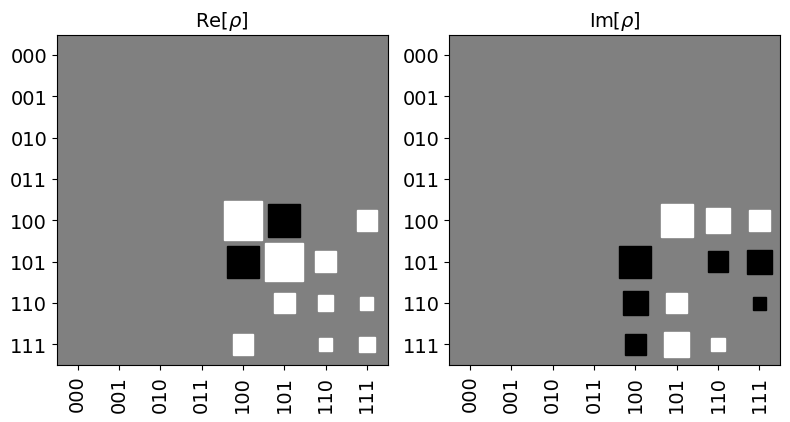

In [13]:
simulator.get_hinton()

**Paulivector Representation**

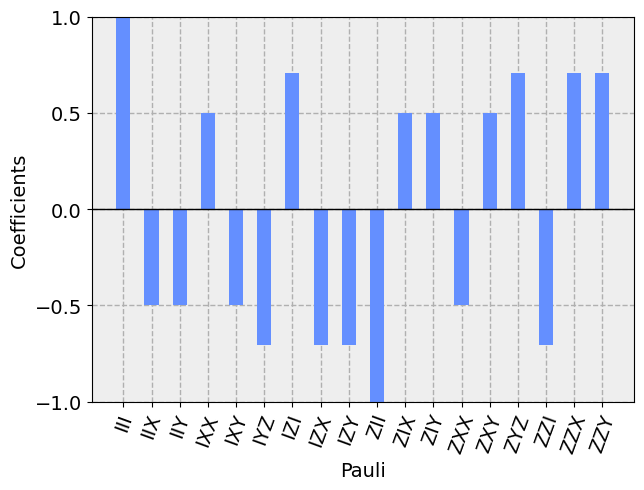

In [14]:
simulator.get_paulivec()

**Bloch sphere Representation**

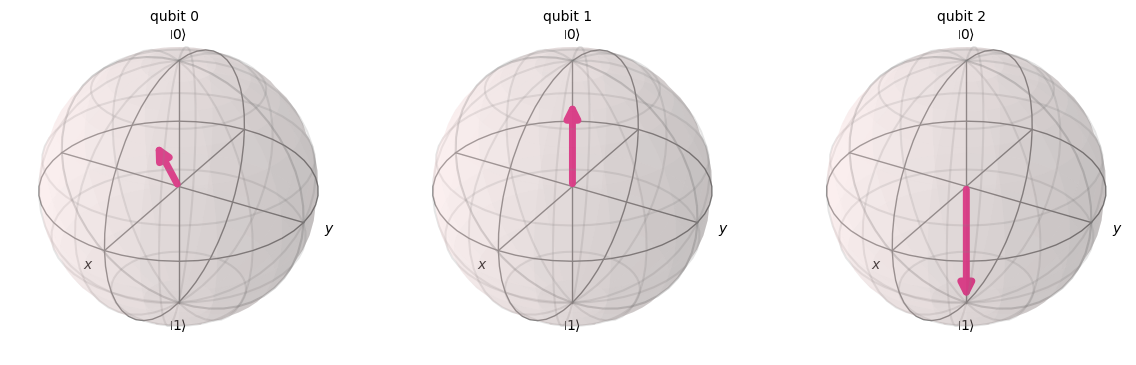

In [15]:
simulator.get_bloch()